In [ ]:
# https://github.com/scikit-learn-contrib/hdbscan
# http://hdbscan.readthedocs.io/en/latest/basic_hdbscan.html
# http://hdbscan.readthedocs.io/en/latest/parameter_selection.html



In [1]:
# Import the required modules:
import numpy as np
import hdbscan

# Define folder paths:
DATA_folder  = '../../Data/'
CLUSTER_folder = DATA_folder+'Clusters/'


In [3]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.decomposition import KernelPCA

train_imgs = np.load(CLUSTER_folder+'train_tot.npy')

kpca = KernelPCA(n_components=50, kernel='poly', degree = 9, copy_X = False)
kpca.fit(train_imgs)



MemoryError: 

In [21]:
k = 3

data = np.load(CLUSTER_folder+'train_'+str(k)+'.npy')

from sklearn import manifold

tsne = manifold.TSNE(n_components = 2, init='random',random_state=0, perplexity=50)
# kpca = KernelPCA(kernel="cosine", n_components = 100)
new_data = tsne.fit_transform(data)


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


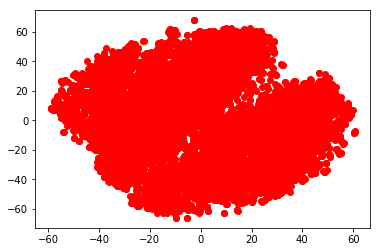

In [22]:
# 2D tSNE:
import matplotlib.pyplot as plt
plt.scatter(new_data[:,0], new_data[:,1], c='red')
plt.legend()
plt.show()

# # 3D tSNE:
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure()
# ax = ax = Axes3D(fig)

# ax.scatter(new_data[:,0], new_data[:,1], new_data[:,2], c='r')
# plt.legend()
# plt.show()

In [8]:
k = 3
data = np.load(CLUSTER_folder+'train_'+str(k)+'.npy')

from sklearn.decomposition import KernelPCA
kpca = KernelPCA(kernel="rbf",n_components=20)

new_data = kpca.fit_transform(data)


In [11]:
a = 50

min(1,max(0,a))

1

In [17]:
# clusterer = hdbscan.HDBSCAN(min_cluster_size=25,metric='mahalanobis', V = new_cov_mat)
clusterer = hdbscan.HDBSCAN(min_cluster_size=5)
# clusterer = hdbscan.HDBSCAN(min_cluster_size=3,min_samples=1,cluster_selection_method='leaf')
# clusterer = hdbscan.HDBSCAN(min_cluster_size=3,min_samples=2)
cluster_labels = clusterer.fit_predict(new_data)
# cluster_labels = clusterer.fit_predict(data)

print(max(cluster_labels)+1)
print(sum(cluster_labels==-1))

2
3231


In [ ]:
lbls_found = np.zeros((10,11,11))
noise      = np.zeros((10,11,11))

for k in range(0,10):
    
    data = np.load(CLUSTER_folder+'train_'+str(k)+'.npy')
    
    for c in range(2,11):
        for s in range(1,c+1):
            clusterer = hdbscan.HDBSCAN(min_cluster_size=c,min_samples=s)
            cluster_labels = clusterer.fit_predict(data)
            lbls_found[k,c,s] = max(cluster_labels)
            noise[k,c,s]      = sum(cluster_labels==-1)

In [4]:
import numpy as np
# np.save('lbls_found.npy', lbls_found)
# np.save('noise.npy', noise)

lbls_found = np.load('lbls_found.npy')
noise      = np.load('noise.npy')

k = 0
for c in range(2,11):
    for s in range(1,c+1):
        print((k,c,s),'clusters: ',lbls_found[k,c,s],' \t noise: ',noise[k,c,s])

(0, 2, 1) clusters:  1015.0  	 noise:  3118.0
(0, 2, 2) clusters:  1015.0  	 noise:  3118.0
(0, 3, 1) clusters:  1.0  	 noise:  40.0
(0, 3, 2) clusters:  1.0  	 noise:  40.0
(0, 3, 3) clusters:  1.0  	 noise:  337.0
(0, 4, 1) clusters:  3.0  	 noise:  458.0
(0, 4, 2) clusters:  3.0  	 noise:  458.0
(0, 4, 3) clusters:  2.0  	 noise:  2008.0
(0, 4, 4) clusters:  11.0  	 noise:  4073.0
(0, 5, 1) clusters:  5.0  	 noise:  1567.0
(0, 5, 2) clusters:  5.0  	 noise:  1567.0
(0, 5, 3) clusters:  1.0  	 noise:  2012.0
(0, 5, 4) clusters:  5.0  	 noise:  4097.0
(0, 5, 5) clusters:  2.0  	 noise:  3302.0
(0, 6, 1) clusters:  1.0  	 noise:  1487.0
(0, 6, 2) clusters:  1.0  	 noise:  1487.0
(0, 6, 3) clusters:  1.0  	 noise:  2753.0
(0, 6, 4) clusters:  2.0  	 noise:  3801.0
(0, 6, 5) clusters:  2.0  	 noise:  3595.0
(0, 6, 6) clusters:  1.0  	 noise:  4169.0
(0, 7, 1) clusters:  1.0  	 noise:  1487.0
(0, 7, 2) clusters:  1.0  	 noise:  1487.0
(0, 7, 3) clusters:  2.0  	 noise:  3385.0
(0, 7, 4) c